In [1]:
!pip install pandas


[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Extract

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('raw-datasets.csv')
df.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...


In [4]:
df.groupby(['Year', 'Cause'])[['Total Deaths']].sum().sort_values(by='Year', ascending=False)

Total Deaths
Year Cause                                    
2022 COVID-19                            12876
2021 Demam Berdarah Dengue (DBD)          1410
     Kebakaran                              42
     KLB Campak                              0
     Gempa Bumi dan Tsunami                  0
...                                        ...
2001 AIDS                                   99
2000 KLB Diare                             218
     Antraks                                 0
     Tetanus Neonatorium                   183
     AIDS                                   47

[682 rows x 1 columns]

# Transform

## Handle missing value

In [5]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     2
Source URL         2
dtype: int64

There have two values in "Page at Source" and two values in "Source URL"

In [6]:
df[df["Source URL"].isna() | df["Page at Source"].isna()]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
323,COVID-19,Bencana Non Alam dan Penyakit,2021,1,121956,COVID19.go.id,NaN,NaN
324,COVID-19,Bencana Non Alam dan Penyakit,2022,1,12876,COVID19.go.id,NaN,NaN


Merge both records information and delete one of them. Create a new category "unknown" for "source url" and "page at source"

In [7]:
get_index = df[df["Source URL"].isna() | df["Page at Source"].isna()].index
df.loc[get_index[-1], ['Source URL', 'Page at Source']] = 'unknown'
# df.loc[get_index[-1], 'Total Deaths'] += df.loc[get_index[0], 'Total Deaths']
# df.drop(get_index[0], inplace=True)
# df.reset_index(drop=True, inplace=True)

In [8]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     1
Source URL         1
dtype: int64

## Remove whitespace

In [9]:
# Gunakan applymap() untuk menghapus whitespace dari setiap nilai di dalam DataFrame
df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Gunakan apply() pada level kolom untuk menghapus whitespace dari setiap nilai di dalam kolom
# df_cleaned = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

"""
Perhatikan bahwa pada contoh ini, kedua metode menghasilkan hasil yang sama. 
applymap() dan apply() pada level kolom (apply() dengan operasi menggunakan .str pada setiap kolom) 
menghasilkan DataFrame yang identik dengan nilai-nilai tanpa whitespace di sekitarnya.
"""
df
# df_cleaned

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,5,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
1057,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
1058,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
1059,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
1060,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


# Check duplicates

In [10]:
df[df.duplicated(keep=False)]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
631,KLB Diare,Bencana Non Alam dan Penyakit,2010,6,73,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.19,https://pusdatin.kemkes.go.id/download.php?fil...
632,KLB Diare,Bencana Non Alam dan Penyakit,2010,6,73,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.19,https://pusdatin.kemkes.go.id/download.php?fil...


In [11]:
df.drop_duplicates(inplace=True)
df[df.duplicated(keep=False)]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL


In [12]:
df[df.duplicated(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source', 'Source URL'], keep=False)]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
104,Antraks,Bencana Non Alam dan Penyakit,2011,9,1,Profil Kesehatan Indonesia Tahun 2013,158,https://pusdatin.kemkes.go.id/download.php?fil...
105,Antraks,Bencana Non Alam dan Penyakit,2011,9,1,Profil Kesehatan Indonesia Tahun 2013,Lampiran 6.33,https://pusdatin.kemkes.go.id/download.php?fil...
112,Antraks,Bencana Non Alam dan Penyakit,2012,8,0,Profil Kesehatan Indonesia Tahun 2013,158,https://pusdatin.kemkes.go.id/download.php?fil...
113,Antraks,Bencana Non Alam dan Penyakit,2012,8,0,Profil Kesehatan Indonesia Tahun 2013,Lampiran 6.33,https://pusdatin.kemkes.go.id/download.php?fil...
119,Antraks,Bencana Non Alam dan Penyakit,2013,7,1,Profil Kesehatan Indonesia Tahun 2013,158,https://pusdatin.kemkes.go.id/download.php?fil...
120,Antraks,Bencana Non Alam dan Penyakit,2013,7,1,Profil Kesehatan Indonesia Tahun 2013,Lampiran 6.33,https://pusdatin.kemkes.go.id/download.php?fil...
319,"Cedera, Keracunan, dan Akibat Sebab Luar Terte...",Bencana Non Alam dan Penyakit,2008,2,5767,Profil Kesehatan Indonesia Tahun 2008,31,https://pusdatin.kemkes.go.id/download.php?fil...
320,"Cedera, Keracunan, dan Akibat Sebab Luar Terte...",Bencana Non Alam dan Penyakit,2008,2,5767,Profil Kesehatan Indonesia Tahun 2008,Lampiran 3.4,https://pusdatin.kemkes.go.id/download.php?fil...
350,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2021,2,705,Profil Kesehatan Indonesia Tahun 2021,215,https://www.kemkes.go.id/downloads/resources/d...
351,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2021,2,705,Profil Kesehatan Indonesia Tahun 2021,Lampiran 65.a,https://www.kemkes.go.id/downloads/resources/d...


Now check the duplicated data again, but this time exclude column "Page at Source". As shown on below data snippet, there are more duplicated data, but with different value for "Page at Source". Remove one of them.

In [13]:
df.drop_duplicates(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source'], keep='first',inplace=True)

In [14]:
df[df.duplicated(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source', 'Source URL'], keep=False)]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL


In [15]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            1038 non-null   object
 1   Type             1038 non-null   object
 2   Year             1038 non-null   int64 
 3   Data Redundancy  1038 non-null   int64 
 4   Total Deaths     1038 non-null   int64 
 5   Source           1038 non-null   object
 6   Page at Source   1037 non-null   object
 7   Source URL       1037 non-null   object
dtypes: int64(3), object(5)
memory usage: 65.0+ KB


In [16]:
df.groupby(['Year', 'Cause'])[['Total Deaths']].sum().sort_values(by=['Year', 'Total Deaths'], ascending=False)

Total Deaths
Year Cause                                    
2022 COVID-19                            12876
2021 COVID-19                           121956
     Tuberkulosis                        14148
     Demam Berdarah Dengue (DBD)           705
     AIDS                                  688
...                                        ...
2001 Antraks                                 2
2000 KLB Diare                             218
     Tetanus Neonatorium                   183
     AIDS                                   47
     Antraks                                 0

[682 rows x 1 columns]

# LOAD

In [17]:
def upload_to_sql(filenames, db_name, debug=False):
    """ Given a list of paths, upload to a database
    """
    conn = sqlite3.connect(f"{db_name}.db")
    
    if debug:
        print("Uploading into database")
    for i, file_path in tqdm(list(enumerate(filenames))):
        
        dat = pd.read_csv(file_path)

        # rename labels
        filename = os.path.basename(file_path).split('.')[0]
        dat = factor_dataframe(dat, filename)

        # write records to sql database
        if i == 0: # if first entry, and table name already exist, replace
            dat.to_sql(db_name, con=conn, index = False, if_exists='replace')
        else: # otherwise append to current table given db_name
            dat.to_sql(db_name, con=conn, index = False, if_exists='append')


# upload into sql database
# upload_to_sql(download_urls, 'example', debug=True)

In [18]:
!pip install seaborn matplotlib


[notice] A new release of pip available: 22.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

   Year                               Cause  Total Deaths
0  2022                            COVID-19         12876
1  2021                            COVID-19        121956
2  2021                        Tuberkulosis         14148
3  2021         Demam Berdarah Dengue (DBD)           705
4  2021                                AIDS           688
5  2021                   Kronis Filariasis           617
6  2021  Kecelakaan Transportasi Laut-Udara           134
7  2021                              Banjir           124
8  2021                          Gempa Bumi           121
9  2021                      Banjir Bandang           120


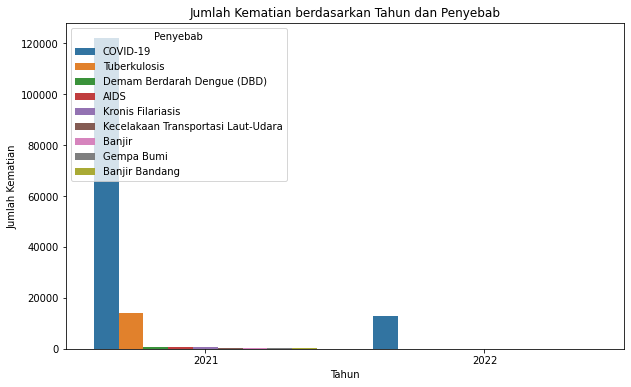

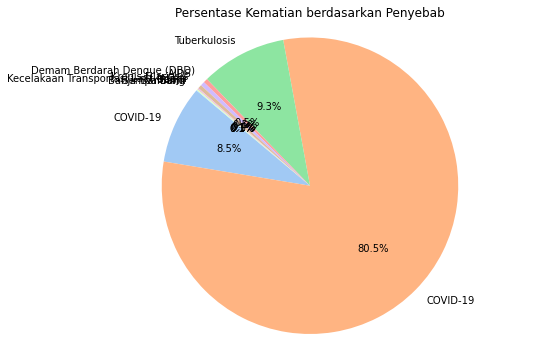

In [20]:
# Mengelompokkan berdasarkan 'Year' dan 'Cause', kemudian menjumlahkan 'Total Deaths'
result = df.groupby(['Year', 'Cause'])[['Total Deaths']].sum()
result_sorted = result.sort_values(by=['Year', 'Total Deaths'], ascending=[False, False]).head(10)

# Mengubah hasil groupby menjadi DataFrame untuk visualisasi dengan Seaborn
result_sorted.reset_index(inplace=True)

print(result_sorted)

# Membuat plot batang menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=result_sorted, x='Year', y='Total Deaths', hue='Cause')
plt.title('Jumlah Kematian berdasarkan Tahun dan Penyebab')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.legend(title='Penyebab')
plt.show()

# Membuat plot pie menggunakan Seaborn
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(result_sorted['Total Deaths'], labels=result_sorted['Cause'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Kematian berdasarkan Penyebab')
plt.axis('equal')
plt.show()